In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

Δ_T = 10

T_room1 = 20
T_room2 = 30 

UA1 = 5
UA2 = 2
UA1_2 = 8
C1 = 3000
C2 = 1000

# x    =           [T_room1, T_room2].T
A = np.array([[-UA1_2/C1,  UA1_2/C1],
              [ UA1_2/C2, -UA1_2/C2]])

# u =      [T_amb, dot_Q_sol, dot_Q_int]
B = np.array([[UA1/C1, 1, 1],
              [UA2/C2, 0, 0]])

C = np.array([[1], [1]])

In [3]:
def discretize_StateSpace(A, B, Δ_T):
    # Discretize System
    # https://en.wikipedia.org/wiki/Discretization#Discretization_of_linear_state_space_models

    
    # exponent =  [[A, B],
    #              [0, 0]] * Δ_T
    exponent = np.vstack((np.hstack((A, B)), np.zeros((B.shape[1], A.shape[1]+B.shape[1]))))*Δ_T

    res = expm(exponent)

    # res = [[Ad, Bd]
    #        [ 0, I]]
    Ad = res[:A.shape[0], :A.shape[1]]
    Bd = res[:B.shape[0], A.shape[1]:]

    return Ad, Bd

In [4]:
Ad, Bd = discretize_StateSpace(A, B, Δ_T)

In [5]:
x_prev = np.array([T_room1, T_room2])

temps = {}

temps[0] = {'T_room1': x_prev[0], 'T_room2': x_prev[1]}

for t in np.arange(Δ_T, 1000, Δ_T):
    u = np.array([0, 0, 0])
    x = Ad@x_prev + Bd@u
    x_prev = x
    temps[t] = {'T_room1': x_prev[0], 'T_room2': x_prev[1]}

df = pd.DataFrame.from_dict(temps, orient='index')

/tmp/ipykernel_28099/1686551538.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


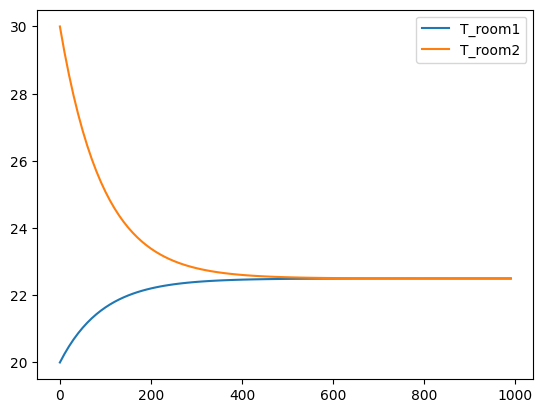

In [6]:
fig, ax = plt.subplots(1, 1)
df.plot(ax=ax)
fig.show()

In [7]:
import models.building_model as bm

In [8]:
model = bm.BuildingModel()

In [9]:
model.step()

AttributeError: 'BuildingModel' object has no attribute 'solar_pos'

In [ ]:
model.T_room1

21.181768939892383

In [15]:
import pvlib

latitude  = 47.4868936 # 37.7749
longitude = 9.7406211 # -122.4194
# altitude  =  # 5

# Location information (latitude, longitude, and altitude)
latitude  = latitude
longitude = longitude
# altitude  = altitude

weather_df = pvlib.iotools.get_pvgis_tmy(latitude, longitude)[0]
time = 0

In [16]:
weather_df.index = pd.date_range('2021-01-01 00:00:00', '2021-12-31 23:00:00', freq='1h', tz='UTC').tz_convert('Europe/Berlin')

In [17]:
weather_df.head(24*3)

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
2021-01-01 01:00:00+01:00,5.79,94.87,0.0,0.0,0.0,265.95,0.78,13.0,97756.0
2021-01-01 02:00:00+01:00,5.75,95.16,0.0,0.0,0.0,264.38,0.76,5.0,97762.0
2021-01-01 03:00:00+01:00,5.72,95.44,0.0,0.0,0.0,262.82,0.74,356.0,97769.0
2021-01-01 04:00:00+01:00,5.68,95.73,0.0,0.0,0.0,261.25,0.72,356.0,97784.0
2021-01-01 05:00:00+01:00,5.65,96.01,0.0,0.0,0.0,259.69,0.69,356.0,97800.0
...,...,...,...,...,...,...,...,...,...
2021-01-03 20:00:00+01:00,5.33,79.79,0.0,0.0,0.0,289.17,3.63,169.0,95339.0
2021-01-03 21:00:00+01:00,5.65,77.87,0.0,0.0,0.0,301.80,3.74,169.0,95266.0
2021-01-03 22:00:00+01:00,5.76,78.51,0.0,0.0,0.0,303.25,4.18,169.0,95193.0
2021-01-03 23:00:00+01:00,5.87,79.14,0.0,0.0,0.0,304.70,4.62,168.0,95120.0


In [ ]:
from models.weather_model import LocalWeather

In [ ]:
w = LocalWeather()

In [ ]:
w.step()

In [ ]:
w.data

temp_air                 11.26
relative_humidity        99.33
ghi                     125.00
dni                     500.90
dhi                      45.00
IR(h)                   279.82
wind_speed                5.50
wind_direction          298.00
pressure             102000.00
Name: 2021-01-01 00:00:00, dtype: float64

In [ ]:
d = {'T_amb': {'Weather-0.Weather_0': 11.26}}

In [ ]:
sum(d['T_amb'].values())/len(d['T_amb'])

11.26